### 🎯 **Scenario Title**: *"The Admissions Algorithm"*

#### 🎓 Chapter 1: The University Dilemma

You are the data scientist at **Altair Tech University**, a futuristic institution that receives thousands of applications each year. The admissions committee wants to **automate the first stage** of the selection process using **logistic regression**.

Your mission is to **predict whether a student should be admitted (1) or not (0)** based on the following features:

* GPA (0.0 to 4.0)
* Entrance Exam Score (0 to 100)
* Number of Extracurricular Projects (0 to 10)

The committee has provided data from the past 500 applicants, including whether each applicant was admitted.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [9]:
np.random.seed(40)
n_applicants = 500

In [10]:
gpa = np.round(np.random.uniform(0,4,n_applicants),1)
exam_score = np.random.randint(40,100,n_applicants)
projects = np.random.randint(0,11,n_applicants)

In [13]:
z = 1.5 * gpa + 0.05 * exam_score + 0.4 * projects - 6
prob = 1 / (1 + np.exp(-z))
admitted = np.random.binomial(1, prob)

In [14]:
admission_df = pd.DataFrame({
    'GPA' : gpa,
    'Exam_score': exam_score,
    'Projects' : projects,
    'Admitted' : admitted}
)
admission_df.head()

,GPA,Exam_score,Projects,Admitted
0,1.6,51,9,1
1,0.2,56,5,0
2,3.2,52,9,1
3,1.1,90,5,1
4,1.8,71,8,1


In [15]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GPA         500 non-null    float64
 1   Exam_score  500 non-null    int64  
 2   Projects    500 non-null    int64  
 3   Admitted    500 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [16]:
admission_df.describe()

,GPA,Exam_score,Projects,Admitted
count,500.000000,500.00000,500.000000,500.000000
mean,1.933600,69.19200,4.994000,0.790000
std,1.150599,16.96723,3.079111,0.407716
min,0.000000,40.00000,0.000000,0.000000
25%,1.000000,54.00000,2.000000,1.000000
50%,1.950000,70.00000,5.000000,1.000000
75%,2.900000,84.00000,8.000000,1.000000
max,4.000000,99.00000,10.000000,1.000000


In [20]:
# How many Students were admitted ?
n_admitted_students = np.sum(admission_df.Admitted == 1)
percent_admitted_students = n_admitted_students * 100 / n_applicants
print(f"{n_admitted_students} were Admitted which is {percent_admitted_students}% of totall applicants")

395 were Admitted which is 79.0% of totall applicants


In [26]:
# What was the range of GPAs for Admitted Students
admitted_applicants = None
admitted_applicants = admission_df[admission_df.Admitted == 1]
min_admitted_gpa = admitted_applicants.GPA.min()
max_admitted_gpa = admitted_applicants.GPA.max()
mean_admitted_gpa = admitted_applicants.GPA.mean()
print(f"Applicated were admitted with GPA in range of ({min_admitted_gpa}, {max_admitted_gpa})\nThe Average of GPA = {mean_admitted_gpa}")

Applicated were admitted with GPA in range of (0.0, 4.0)
The Average of GPA = 2.1956962025316455


In [32]:
# Are there Missing values
missing_values = admission_df.isna().sum()

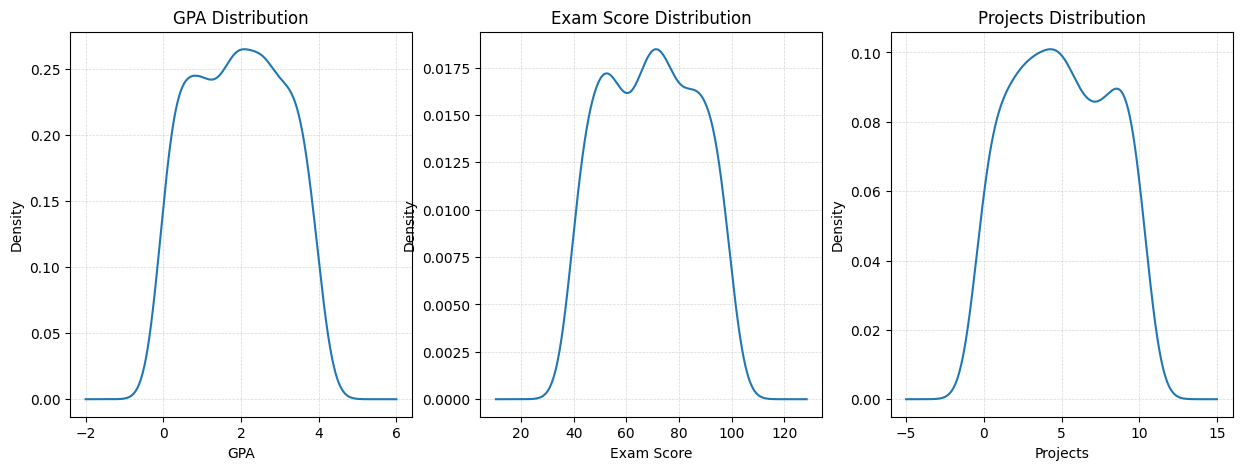

In [45]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)
ax = ax.flatten()

admission_df.GPA.plot(kind='kde', ax=ax[0])
admission_df.Exam_score.plot(kind='kde', ax=ax[1])
admission_df.Projects.plot(kind='kde', ax=ax[2])

ax[0].set_xlabel("GPA")
ax[1].set_xlabel("Exam Score")
ax[2].set_xlabel("Projects")

ax[0].set_title("GPA Distribution")
ax[1].set_title("Exam Score Distribution")
ax[2].set_title("Projects Distribution")

for i in range(len(ax)):
    ax[i].grid(axis='both', lw=0.5, alpha=0.5, linestyle='--')

<Axes: >

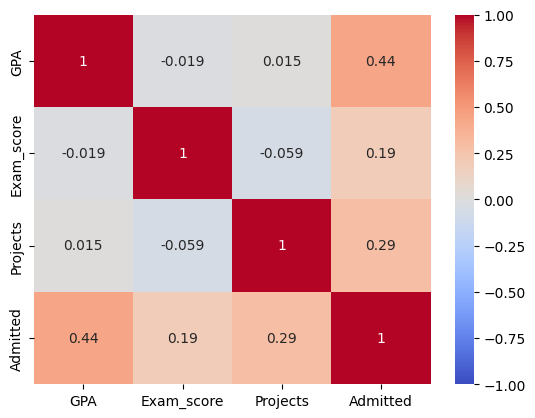

In [46]:
sns.heatmap(admission_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

<h2>📘 Chapter 2: Modeling the Decision — “Train the Gatekeeper”</h2>
🎯 Your objective:
Build a logistic regression model that can predict whether a student should be admitted based on:

* GPA
* Exam Score
* Number of Projects

In [48]:
def sigmoid_function (z):
    """
    Compute sigmoid of z
    Args:
        z (ndarray (m,)) : m training example
    Returns:
        prediction g(z): same shape as z
    """
    return 1 / (1 + np.exp(-z))

In [49]:
def compute_output (x, w, b):
    """
    output logistic regression output
    Args:
        x (ndarray (m, n)) : m examples with n features
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        f_wb (ndarray (m,)) : output of logistic regression regression
    """
    z = np.dot(x, w) + b
    return sigmoid_function(z)